In [4]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/senadores.csv', sep=';', skiprows=1, decimal=',')
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2018,1,ACIR GURGACZ,"Aluguel de i Aéreis para escritório político, ...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,02/01/2018,Despesa com pagamento de aluguel de im�vel par...,6000.00
1,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,M2CJMM,02/01/2018,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....",274.99
2,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,SFEXYF,02/01/2018,"Companhia Aérea: LATAM, Localizador: SFEXYF. P...",1094.29
3,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,V64HTR,24/01/2018,"Companhia Aérea: AZUL, Localizador: V64HTR. Pa...",1553.99
4,2018,2,ACIR GURGACZ,"Aluguel de i Aéreis para escritório político, ...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,002/18,01/02/2018,Despesa com pagamento de aluguel de im�vel par...,6000.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24492 entries, 0 to 24491
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                24492 non-null  int64  
 1   MES                24492 non-null  int64  
 2   SENADOR            24492 non-null  object 
 3   TIPO_DESPESA       24492 non-null  object 
 4   CNPJ_CPF           24492 non-null  object 
 5   FORNECEDOR         24492 non-null  object 
 6   DOCUMENTO          23476 non-null  object 
 7   DATA               24492 non-null  object 
 8   DETALHAMENTO       18882 non-null  object 
 9   VALOR_REEMBOLSADO  24492 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 1.9+ MB


In [ ]:
df.describe()

,ANO,MES,VALOR_REEMBOLSADO
count,24492.0,24492.000000,24492.000000
mean,2018.0,6.192226,1045.431215
std,0.0,3.305847,2718.840577
min,2018.0,1.000000,0.010000
25%,2018.0,3.000000,125.000000
50%,2018.0,6.000000,287.200000
75%,2018.0,9.000000,1032.005000
max,2018.0,12.000000,103900.000000


In [ ]:
#Valor total de reembolso
df.VALOR_REEMBOLSADO.sum()

25604701.33

In [ ]:
#Quantos reembolsos foram solicitados por cada senador
df.SENADOR.value_counts()

EDUARDO LOPES          864
PAULO BAUER            824
WELLINGTON FAGUNDES    800
JOS� SERRA             715
GLEISI HOFFMANN        653
                      ... 
ALVARO DIAS             40
FERNANDO COLLOR         27
JADER BARBALHO          19
CRISTOVAM BUARQUE       16
Z� SANTANA               8
Name: SENADOR, Length: 91, dtype: int64

In [ ]:
#Quanto cada senador solicitou de reembolso em 2018
df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)

SENADOR
EDUARDO BRAGA         529599.18
VANESSA GRAZZIOTIN    515969.63
JO�O CAPIBERIBE       513333.90
�NGELA PORTELA        485806.44
OMAR AZIZ             484143.98
                        ...    
ALVARO DIAS            44037.88
WALTER PINHEIRO        32733.67
CRISTOVAM BUARQUE      32400.00
Z� SANTANA             23300.67
IONE GUIMAR�ES         11379.91
Name: VALOR_REEMBOLSADO, Length: 91, dtype: float64

In [ ]:
#5 maiores valores de reembolso
df.nlargest(5, 'VALOR_REEMBOLSADO').T

,21225,21488,21491,22666,5573
ANO,2018,2018,2018,2018,2018
MES,12,11,12,12,12
SENADOR,ROSE DE FREITAS,S�RGIO PETEC�O,S�RGIO PETEC�O,VANESSA GRAZZIOTIN,EDUARDO LOPES
TIPO_DESPESA,Divulgação da atividade parlamentar,"Contratação de consultorias, assessorias, pesq...","Contratação de consultorias, assessorias, pesq...","Contratação de consultorias, assessorias, pesq...",Divulgação da atividade parlamentar
CNPJ_CPF,05.461.408/0001-84,22.233.033/0001-14,22.233.033/0001-14,28.916.527/0001-80,14.616.988/0001-22
FORNECEDOR,Grafitusa S/A,Reis Grafica e Comercio de Etiquetas Eireli ME,Reis Grafica e Comercio de Etiquetas Eireli ME,A MAQUINA SOLUCOES EM MIDIA LTDA ME,NG Comunicação Visual Ltda
DOCUMENTO,000009681,4193,000004252,048,00000714
DATA,29/03/2019,29/11/2018,17/12/2018,17/12/2018,05/12/2018
DETALHAMENTO,NaN,NaN,NaN,TRABALHOS técNICOS DE APOIO AO EXERCICIO DO MA...,NaN
VALOR_REEMBOLSADO,103900,102000,102000,100000,66000


In [ ]:
#5 menores valores de reembolso
df.nsmallest(5, 'VALOR_REEMBOLSADO').T

,3868,10161,10191,10196,10233
ANO,2018,2018,2018,2018,2018
MES,5,3,4,4,5
SENADOR,D�RIO BERGER,JORGE VIANA,JORGE VIANA,JORGE VIANA,JORGE VIANA
TIPO_DESPESA,"Passagens aéreas, aquáticas e terrestres nacio...","Passagens aéreas, aquáticas e terrestres nacio...","Passagens aéreas, aquáticas e terrestres nacio...","Passagens aéreas, aquáticas e terrestres nacio...","Passagens aéreas, aquáticas e terrestres nacio..."
CNPJ_CPF,02.575.829/0001-48,33.937.681/0001-78,07.575.651/0001-59,33.937.681/0001-78,33.937.681/0001-78
FORNECEDOR,AVIANCA BRASIL,LATAM,GOL TRANSPORTES AérEOS S/A,LATAM,LATAM
DOCUMENTO,K5RKJV,W4UUE7,ZHV36P,W6ZMK3,OZALEF
DATA,29/05/2018,21/03/2018,09/03/2018,17/04/2018,22/05/2018
DETALHAMENTO,"Companhia Aérea: AVIANCA, Localizador: K5RKJV....","Companhia Aérea: LATAM, Localizador: W4UUE7. P...","Companhia Aérea: GOL, Localizador: ZHV36P. Pas...","Companhia Aérea: LATAM, Localizador: W6ZMK3. P...","Companhia Aérea: LATAM, Localizador: OZALEF. P..."
VALOR_REEMBOLSADO,0.01,0.01,0.01,0.01,0.01


In [ ]:
#Quantidade total de reembolso por tipo de despesa
df.TIPO_DESPESA.value_counts()

Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   10147
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                  5820
Aluguel de i Aéreis para escritório político, compreendendo despesas concernentes a eles.                                                                                                           5042
Aquisição de material de consumo para uso no escrit�rio pol�tico, inclusive aquisição ou locação de software, despesas postais, aquisição de publica��es, locação de m�veis e de equipamentos.      1761
Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exerc�cio do mandato parlamentar                                                              

In [ ]:
#Quanto toi reembolsado por cada tipo de despesa
df.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)


TIPO_DESPESA
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                 6335284.94
Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   5620092.84
Aluguel de i Aéreis para escritório político, compreendendo despesas concernentes a eles.                                                                                                          5041438.25
Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exerc�cio do mandato parlamentar                                                             4966449.41
Divulgação da atividade parlamentar                                                                                                                                

#Análise Eleitorado Brasileiro
tse.jus.br

In [14]:
#tse.jus.br

In [15]:
df = pd.read_csv('/content/eleitorado.csv', sep=';')

In [16]:
df.head(3).T

,0,1,2
NR_ANO_ELEICAO,2018,2018,2018
CD_PAIS,1,1,1
NM_PAIS,Brasil,Brasil,Brasil
SG_REGIAO,N,N,N
NM_REGIAO,Norte,Norte,Norte
SG_UF,AC,AC,AC
NM_UF,Acre,Acre,Acre
CD_MUNICIPIO,1120,1570,1058
NM_MUNICIPIO,ACREL�NDIA,ASSIS BRASIL,BRASIL�IA
QTD_ELEITORES,8809,5726,16041


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5741 entries, 0 to 5740
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   NR_ANO_ELEICAO                   5741 non-null   int64 
 1   CD_PAIS                          5741 non-null   int64 
 2   NM_PAIS                          5741 non-null   object
 3   SG_REGIAO                        5741 non-null   object
 4   NM_REGIAO                        5741 non-null   object
 5   SG_UF                            5741 non-null   object
 6   NM_UF                            5741 non-null   object
 7   CD_MUNICIPIO                     5741 non-null   int64 
 8   NM_MUNICIPIO                     5741 non-null   object
 9   QTD_ELEITORES                    5741 non-null   int64 
 10  QTD_ELEITORES_FEMININO           5741 non-null   int64 
 11  QTD_ELEITORES_MASCULINO          5741 non-null   int64 
 12  QTD_ELEITORES_NAOINFORMADO       5

In [37]:
#5 cidade com maior quantidade de eleitores deficientes
df.nlargest(5, 'QTD_ELEITORES_DEFICIENTE')[['NM_MUNICIPIO', 'QTD_ELEITORES_DEFICIENTE']]

,NM_MUNICIPIO,QTD_ELEITORES_DEFICIENTE
5358,S�O PAULO,138884
3660,RIO DE JANEIRO,23228
4990,GUARULHOS,22266
535,SALVADOR,19305
4010,CAXIAS DO SUL,18360


In [38]:
#cidade com maior qnt de eleitor deficiente
df[df['QTD_ELEITORES_DEFICIENTE'] == df['QTD_ELEITORES_DEFICIENTE'].max()][['NM_MUNICIPIO', 'QTD_ELEITORES_DEFICIENTE']]

,NM_MUNICIPIO,QTD_ELEITORES_DEFICIENTE
5358,S�O PAULO,138884


In [68]:
fem = df['QTD_ELEITORES_FEMININO'].sum()
mas = df['QTD_ELEITORES_MASCULINO'].sum()
ninf = df['QTD_ELEITORES_NAOINFORMADO'].sum()

def porcent(x):
  total = df['QTD_ELEITORES'].sum()
  return ((x / total) * 100).round(2)

print(f'Eleitoras {porcent(fem)}%')
print(f'Eleitores {porcent(mas)}%')
print(f'Não Informado {porcent(ninf)}%')

Eleitoras 52.5%
Eleitores 47.45%
Não Informado 0.04%


In [78]:
# quantos municípios tem mais homens que mulhers
df[df['QTD_ELEITORES_FEMININO'] < df['QTD_ELEITORES_MASCULINO']].count()

NR_ANO_ELEICAO                     2279
CD_PAIS                            2279
NM_PAIS                            2279
SG_REGIAO                          2279
NM_REGIAO                          2279
SG_UF                              2279
NM_UF                              2279
CD_MUNICIPIO                       2279
NM_MUNICIPIO                       2279
QTD_ELEITORES                      2279
QTD_ELEITORES_FEMININO             2279
QTD_ELEITORES_MASCULINO            2279
QTD_ELEITORES_NAOINFORMADO         2279
QTD_ELEITORES_MENOR16              2279
QTD_ELEITORES_16                   2279
QTD_ELEITORES_17                   2279
QTD_ELEITORES_18                   2279
QTD_ELEITORES_19                   2279
QTD_ELEITORES_20                   2279
QTD_ELEITORES_21A24                2279
QTD_ELEITORES_25A29                2279
QTD_ELEITORES_30A34                2279
QTD_ELEITORES_35A39                2279
QTD_ELEITORES_40A44                2279
QTD_ELEITORES_45A49                2279


In [80]:
# em quais municípios tem mais homens que mulheres ????????????

df[df['QTD_ELEITORES_FEMININO'] < df['QTD_ELEITORES_MASCULINO']][['NM_MUNICIPIO', 'QTD_ELEITORES', 'QTD_ELEITORES_FEMININO', 'QTD_ELEITORES_MASCULINO']]

,NM_MUNICIPIO,QTD_ELEITORES,QTD_ELEITORES_FEMININO,QTD_ELEITORES_MASCULINO
0,ACREL�NDIA,8809,4322,4487
3,BUJARI,8683,4287,4396
4,CAPIXABA,6832,3324,3508
7,FEIJ�,20565,10088,10476
8,JORD�O,4793,2211,2582
...,...,...,...,...
5710,SEUL,105,48,57
5719,S�FIA,16,3,13
5729,T�QUIO,26092,11908,14184
5732,VARS�VIA,188,81,107


In [83]:
# relação mulher homem
# criar coluna

df['RELAÇÃO_FM'] = df['QTD_ELEITORES_FEMININO'] / df['QTD_ELEITORES_MASCULINO']

In [85]:
df.nlargest(5, 'RELAÇÃO_FM')

,NR_ANO_ELEICAO,CD_PAIS,NM_PAIS,SG_REGIAO,NM_REGIAO,SG_UF,NM_UF,CD_MUNICIPIO,NM_MUNICIPIO,QTD_ELEITORES,QTD_ELEITORES_FEMININO,QTD_ELEITORES_MASCULINO,QTD_ELEITORES_NAOINFORMADO,QTD_ELEITORES_MENOR16,QTD_ELEITORES_16,QTD_ELEITORES_17,QTD_ELEITORES_18,QTD_ELEITORES_19,QTD_ELEITORES_20,QTD_ELEITORES_21A24,QTD_ELEITORES_25A29,QTD_ELEITORES_30A34,QTD_ELEITORES_35A39,QTD_ELEITORES_40A44,QTD_ELEITORES_45A49,QTD_ELEITORES_50A54,QTD_ELEITORES_55A59,QTD_ELEITORES_60A64,QTD_ELEITORES_65A69,QTD_ELEITORES_70A74,QTD_ELEITORES_75A79,QTD_ELEITORES_80A84,QTD_ELEITORES_85A89,QTD_ELEITORES_90A94,QTD_ELEITORES_95A99,QTD_ELEITORES_MAIORIGUAL100,QTD_ELEITORES_IDADEINVALIDO,QTD_ELEITORES_IDADENAOSEAPLICA,QTD_ELEITORES_IDADENAOINFORMADA,QTD_ELEITORES_COMBIOMETRIA,QTD_ELEITORES_SEMBIOMETRIA,QTD_ELEITORES_DEFICIENTE,QUANTITATIVO_NOMESOCIAL,RELAÇÃO_FM
5581,2018,2,Exterior,E,Exterior,ZZ,Exterior,99350,BAMAKO,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,inf
5613,2018,2,Exterior,E,Exterior,ZZ,Exterior,38920,COTONOU,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,inf
5652,2018,2,Exterior,E,Exterior,ZZ,Exterior,99422,LETHEM,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,inf
5658,2018,2,Exterior,E,Exterior,ZZ,Exterior,29963,LOM�,3,3,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,inf
5653,2018,2,Exterior,E,Exterior,ZZ,Exterior,29939,LIBREVILLE,21,19,2,0,0,0,0,0,0,0,0,3,1,2,2,0,8,0,3,1,1,0,0,0,0,0,0,0,0,0,0,21,0,0,9.5


In [86]:
#cópia com df com eleitores em cidades apenas brasileiras 
df_brasil = df[df['CD_PAIS'] == 1].copy()

In [88]:
df_brasil.head(3).T

,0,1,2
NR_ANO_ELEICAO,2018,2018,2018
CD_PAIS,1,1,1
NM_PAIS,Brasil,Brasil,Brasil
SG_REGIAO,N,N,N
NM_REGIAO,Norte,Norte,Norte
SG_UF,AC,AC,AC
NM_UF,Acre,Acre,Acre
CD_MUNICIPIO,1120,1570,1058
NM_MUNICIPIO,ACREL�NDIA,ASSIS BRASIL,BRASIL�IA
QTD_ELEITORES,8809,5726,16041


In [90]:
df_brasil.nlargest(5, 'RELAÇÃO_FM').T

,3653,535,2894,373,329
NR_ANO_ELEICAO,2018,2018,2018,2018,2018
CD_PAIS,1,1,1,1,1
NM_PAIS,Brasil,Brasil,Brasil,Brasil,Brasil
SG_REGIAO,SE,NE,NE,NE,NE
NM_REGIAO,Sudeste,Nordeste,Nordeste,Nordeste,Nordeste
SG_UF,RJ,BA,PE,BA,BA
NM_UF,Rio de Janeiro,Bahia,Pernambuco,Bahia,Bahia
CD_MUNICIPIO,58122,38490,24910,35939,35157
NM_MUNICIPIO,QUEIMADOS,SALVADOR,OLINDA,IREC�,FEIRA DE SANTANA
QTD_ELEITORES,72971,1827436,276081,44082,384050


In [91]:
df_brasil.nsmallest(5, 'RELAÇÃO_FM').T


,2389,1237,2362,2396,2361
NR_ANO_ELEICAO,2018,2018,2018,2018,2018
CD_PAIS,1,1,1,1,1
NM_PAIS,Brasil,Brasil,Brasil,Brasil,Brasil
SG_REGIAO,CO,NE,CO,CO,CO
NM_REGIAO,Centro-Oeste,Nordeste,Centro-Oeste,Centro-Oeste,Centro-Oeste
SG_UF,MT,MA,MT,MT,MT
NM_UF,Mato Grosso,Maranh�o,Mato Grosso,Mato Grosso,Mato Grosso
CD_MUNICIPIO,90980,7900,90948,90921,90808
NM_MUNICIPIO,SANTA CRUZ DO XINGU,MARAJ� DO SENA,NOVO SANTO ANT�NIO,SERRA NOVA DOURADA,NOVO MUNDO
QTD_ELEITORES,1571,6416,1701,1379,5064


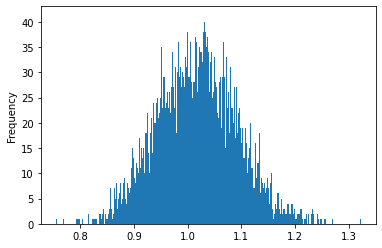

In [93]:
%matplotlib inline

df_brasil['RELAÇÃO_FM'].plot.hist(bins=500)

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


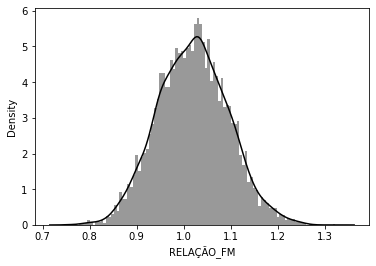

In [96]:
sns.distplot(df_brasil['RELAÇÃO_FM'], bins=100, color='black')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


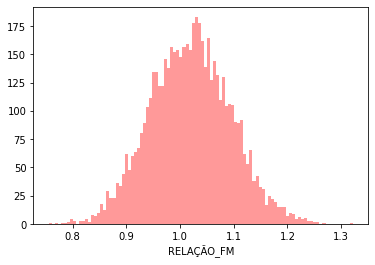

In [97]:
sns.distplot(df_brasil['RELAÇÃO_FM'], bins=100, color='red', kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


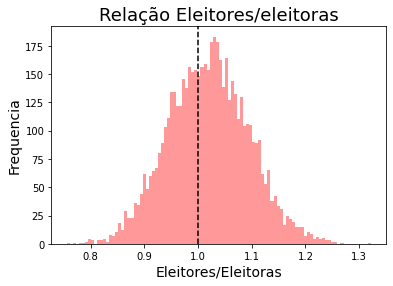

In [105]:
sns.distplot(df_brasil['RELAÇÃO_FM'], bins=100, color='red', kde=False)

plt.title('Relação Eleitores/eleitoras', fontsize =18)
plt.xlabel('Eleitores/Eleitoras', fontsize=14)
plt.ylabel('Frequencia', fontsize=14)
plt.axvline(1.0, color='black',linestyle='--')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 84.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 84.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.9% of the points cannot be placed; y

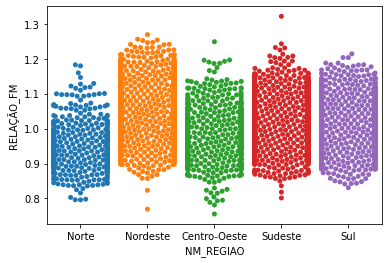

In [108]:
#verificar a distribuição masculino feminino 
#mostrando os pontos(municipios)

sns.swarmplot(data=df_brasil, x='NM_REGIAO', y='RELAÇÃO_FM')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 84.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 84.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.9% of the points cannot be placed; y

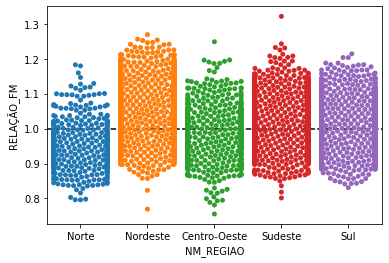

In [110]:
#traçando a linha na vertical
sns.swarmplot(data=df_brasil, x='NM_REGIAO', y='RELAÇÃO_FM')
plt.axhline(1.0, color='black',linestyle='--', )

In [111]:
lista = ['QTD_ELEITORES_16', 'QTD_ELEITORES_17', 'QTD_ELEITORES_18', 
         'QTD_ELEITORES_19', 'QTD_ELEITORES_20', 'QTD_ELEITORES_21A24',
         'QTD_ELEITORES_25A29', 'QTD_ELEITORES_30A34', 'QTD_ELEITORES_35A39',
         'QTD_ELEITORES_40A44', 'QTD_ELEITORES_45A49', 'QTD_ELEITORES_50A54',
         'QTD_ELEITORES_55A59', 'QTD_ELEITORES_60A64', 'QTD_ELEITORES_65A69',
         'QTD_ELEITORES_70A74', 'QTD_ELEITORES_75A79', 'QTD_ELEITORES_80A84',
         'QTD_ELEITORES_85A89', 'QTD_ELEITORES_90A94','QTD_ELEITORES_95A99',
         'QTD_ELEITORES_MAIORIGUAL100', 'QTD_ELEITORES_IDADENAOINFORMADA']

total_idade = df[lista].sum()
total_idade

QTD_ELEITORES_16                     403683
QTD_ELEITORES_17                     996934
QTD_ELEITORES_18                    2326608
QTD_ELEITORES_19                    2817706
QTD_ELEITORES_20                    3034507
QTD_ELEITORES_21A24                12650382
QTD_ELEITORES_25A29                15260717
QTD_ELEITORES_30A34                15890254
QTD_ELEITORES_35A39                16207393
QTD_ELEITORES_40A44                14224025
QTD_ELEITORES_45A49                12828382
QTD_ELEITORES_50A54                12223143
QTD_ELEITORES_55A59                10691738
QTD_ELEITORES_60A64                 8907997
QTD_ELEITORES_65A69                 6811288
QTD_ELEITORES_70A74                 4763343
QTD_ELEITORES_75A79                 3170195
QTD_ELEITORES_80A84                 1972721
QTD_ELEITORES_85A89                 1121775
QTD_ELEITORES_90A94                  689078
QTD_ELEITORES_95A99                  272447
QTD_ELEITORES_MAIORIGUAL100           39049
QTD_ELEITORES_IDADENAOINFORMADA 

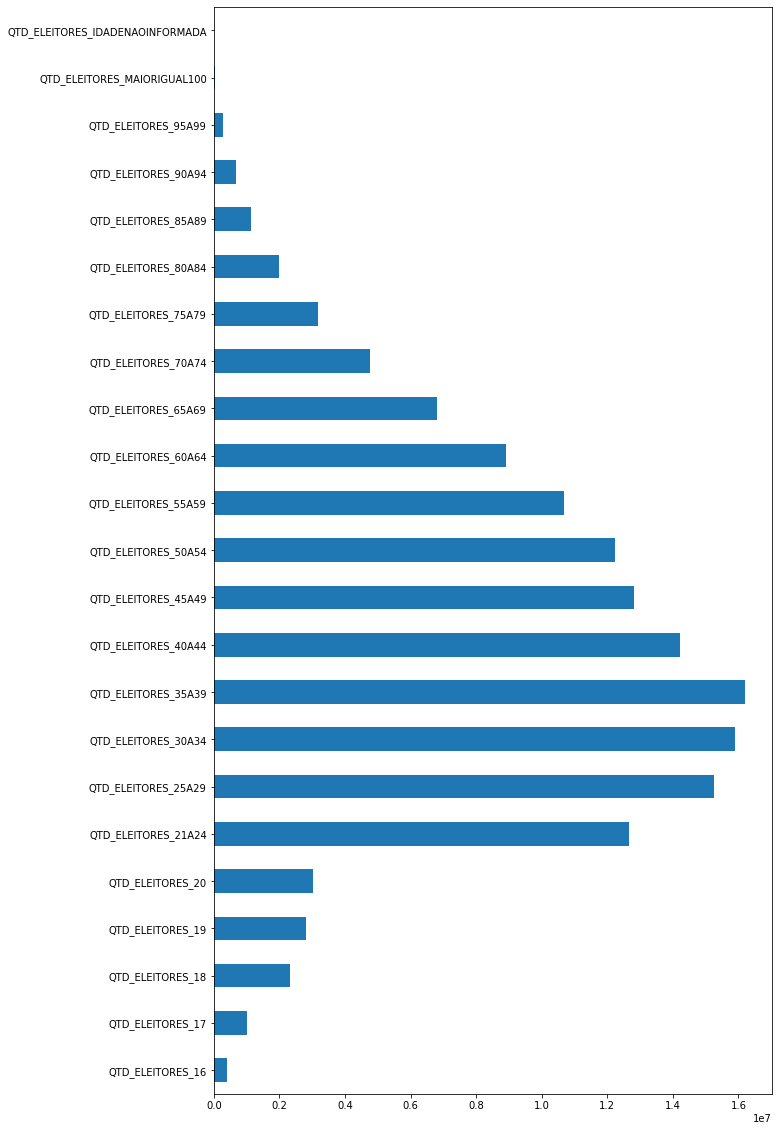

In [112]:
total_idade.plot.barh(figsize=(10,20))

#Mapa das escolas do Rio Grande do Sul por taxa de distorção de série


In [114]:
# dados.rs.gov.br

In [ ]:
# !python -m pip install folium

In [115]:
import folium

In [117]:
df = pd.read_csv('/content/mapa_educacao.csv',
                encoding='latin1',skiprows=1)
df.head()

,Município,ibge,latitude,longitude,/Educação/Ens...de Série/Total 2013 (-)
0,Aceguá,4300034,-31.86076,-54.16706,"25,7"
1,Água Santa,4300059,-28.16720,-52.03100,"14,7"
2,Agudo,4300109,-29.64470,-53.25150,"26,4"
3,Ajuricaba,4300208,-28.23420,-53.77570,"24,1"
4,Alecrim,4300307,-27.65790,-54.76490,"18,9"


In [120]:
df.rename(columns={'/Educação/Ens...de Série/Total 2013 (-)':'taxa_distorcao'}, 
          inplace=True)

#ou
## df = df.rename(columns={'/Educação/Ens...de Série/Total 2013 (-)':'taxa_distorcao'})

df.head()

,Município,ibge,latitude,longitude,taxa_distorcao
0,Aceguá,4300034,-31.86076,-54.16706,"25,7"
1,Água Santa,4300059,-28.16720,-52.03100,"14,7"
2,Agudo,4300109,-29.64470,-53.25150,"26,4"
3,Ajuricaba,4300208,-28.23420,-53.77570,"24,1"
4,Alecrim,4300307,-27.65790,-54.76490,"18,9"


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Município       495 non-null    object 
 1   ibge            495 non-null    int64  
 2   latitude        495 non-null    float64
 3   longitude       495 non-null    float64
 4   taxa_distorcao  495 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 19.5+ KB


In [122]:
df['taxa_distorcao'] = df['taxa_distorcao'].str.replace(',','.')

df.head()

,Município,ibge,latitude,longitude,taxa_distorcao
0,Aceguá,4300034,-31.86076,-54.16706,25.7
1,Água Santa,4300059,-28.16720,-52.03100,14.7
2,Agudo,4300109,-29.64470,-53.25150,26.4
3,Ajuricaba,4300208,-28.23420,-53.77570,24.1
4,Alecrim,4300307,-27.65790,-54.76490,18.9


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Município       495 non-null    object 
 1   ibge            495 non-null    int64  
 2   latitude        495 non-null    float64
 3   longitude       495 non-null    float64
 4   taxa_distorcao  495 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 19.5+ KB


In [124]:
df['taxa_distorcao'] = df['taxa_distorcao'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Município       495 non-null    object 
 1   ibge            495 non-null    int64  
 2   latitude        495 non-null    float64
 3   longitude       495 non-null    float64
 4   taxa_distorcao  495 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.5+ KB


In [126]:
df.nsmallest(5, 'taxa_distorcao')

,Município,ibge,latitude,longitude,taxa_distorcao
490,Vista Alegre do Prata,4323606,-28.8052,-51.7946,2.6
375,Santo Antônio do Palma,4317558,-28.4956,-52.0267,4.3
28,Áurea,4301552,-27.6936,-52.0505,5.8
268,Nicolau Vergueiro,4312674,-28.5298,-52.4676,7.0
128,Derrubadas,4306320,-27.2642,-53.8645,7.4


In [127]:
df.nlargest(5, 'taxa_distorcao')


,Município,ibge,latitude,longitude,taxa_distorcao
307,Pedras Altas,4314175,-31.7217,-53.5838,56.0
316,Pinheiro Machado,4314506,-31.5794,-53.3798,53.9
17,Arambaré,4300851,-30.9093,-51.5046,52.8
140,Eldorado do Sul,4306767,-30.0847,-51.6187,51.9
35,Barra do Quaraí,4301875,-30.2029,-57.5497,51.5


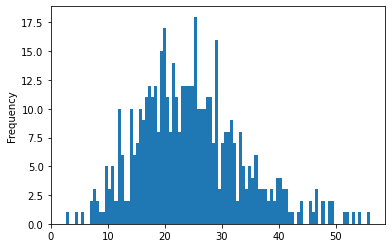

In [128]:
df['taxa_distorcao'].plot.hist(bins=100)

In [132]:
#quantidade de muninípios com taxa de distorcao <= 10
df[df['taxa_distorcao'] <= 10].count()

Município         17
ibge              17
latitude          17
longitude         17
taxa_distorcao    17
dtype: int64

In [133]:
#quantidade de muninípios com taxa de distorcao >= 45
df[df['taxa_distorcao'] >= 45].count()

Município         17
ibge              17
latitude          17
longitude         17
taxa_distorcao    17
dtype: int64

In [136]:
brasil = folium.Map(
    location=[-13.6603615, -69.77], #coordenada google maps
    # zoom_start=4
)
brasil

In [138]:
rs = folium.Map(
    location=[-30.0346316, -51.2176986], 
    zoom_start=6
)

rs

In [139]:
# Percorrendo o datframe com as melhores escola 
# E desenhar um marcador para cada informaçoes 
# Será utilizado for e um iterrows

for indice, municipio in df[df['taxa_distorcao']<= 10].iterrows():
    folium.Marker(
        location=[municipio['latitude'],municipio['longitude']],
        popup=municipio['Município'],
        icon= folium.map.Icon(color='green')
    ).add_to(rs)
    
rs

In [141]:
for indice, municipio in df[df['taxa_distorcao']  >= 45].iterrows():
    folium.Marker(
        location=[municipio['latitude'],municipio['longitude']],
        popup=municipio['Município'],
        icon= folium.map.Icon(color='red')
    ).add_to(rs)
    
rs

In [147]:
#Taxa de distorção de Porto Alegre
df[df['Município']  == 'Porto Alegre']['taxa_distorcao']

325    32.3
Name: taxa_distorcao, dtype: float64

In [149]:
#Taxa de distorção de Porto Alegre
df[df['Município']  == 'Porto Alegre'][['Município', 'taxa_distorcao']]

,Município,taxa_distorcao
325,Porto Alegre,32.3
